In [110]:
from main import Optimisation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:

import yfinance as yfin

prices = yfin.download(tickers=['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA'], period='1y')['Adj Close']
prices.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2020-10-16,118.259377,3272.709961,1573.010010,217.662735,439.670013
2020-10-19,115.238815,3207.209961,1534.609985,212.272202,430.829987
2020-10-20,116.759026,3217.010010,1555.930054,212.698273,421.940002
2020-10-21,116.123123,3184.939941,1593.310059,212.846909,422.640015
2020-10-22,115.010277,3176.399902,1615.329956,212.936096,425.790009


In [113]:
opt = Optimisation(prices)
import numpy as np
industries = {'Tech': ['AAPL', 'GOOG'],
                'Car': ['MSFT', 'TSLA'],
                'Aloner': ['AMZN']}

tickers = prices.columns.tolist()
industryWeights = {'Tech': 0.4,
                    'Car': 0.4,
                    'Aloner': 0.2}

opt.optimise(industries=industries, tickers=tickers, industryWeights=industryWeights, past_weights=[1/len(tickers)]*len(tickers))

     fun: 0.07356279364764617
     jac: array([-0.00477878, -0.09039463,  0.03503906,  0.00066306, -0.10474576])
 message: 'Optimization terminated successfully'
    nfev: 257
     nit: 37
    njev: 36
  status: 0
 success: True
       x: array([0.13151282, 0.02128575, 0.12699974, 0.78246039, 0.02307407])

In [114]:
from main import RollingOptimisation
import pandas as pd
import datetime as dt

prices = yfin.download(tickers=['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA'], period='1y', interval='1d')['Adj Close'].ffill()
rollopt = RollingOptimisation(prices)

port, weights = rollopt.backtest()


[*********************100%***********************]  5 of 5 completed


100%|██████████| 198/198 [00:33<00:00,  5.85it/s]


<AxesSubplot:>

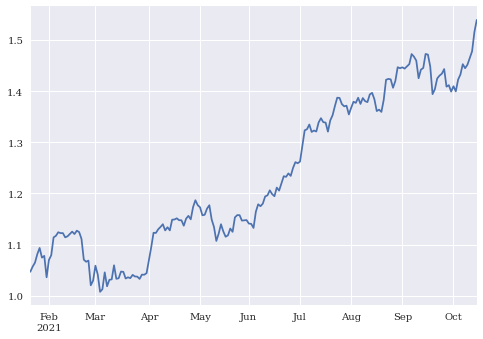

In [115]:
((weights * prices.iloc[63:, ].pct_change()).ffill().dropna().sum(axis=1)+1).cumprod().plot()

<AxesSubplot:>

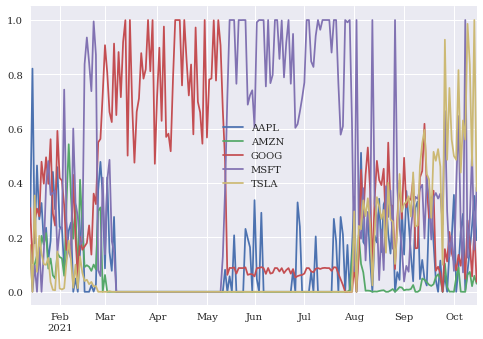

In [116]:
weights.plot()

In [118]:
weights.sum(axis=1)

2021-01-13    1.022758
2021-01-14    0.987205
2021-01-15    0.994285
2021-01-18    0.978747
2021-01-19    1.030969
                ...   
2021-10-11    1.513432
2021-10-12    1.512427
2021-10-13    1.297803
2021-10-14    1.795429
2021-10-15    1.011814
Length: 198, dtype: float64